calibration in function

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/train_eng.pkl")
val = pd.read_pickle("../../data_lake/output/val_eng.pkl")

In [4]:
df = df.drop(columns=['card1', 'card2', 'card3','card5', 'addr1', 'addr2','id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29','id_35', 'id_36', 'id_37', 'id_38','id_34','M4'])

In [5]:
val = val.drop(columns=['card1', 'card2', 'card3','card5', 'addr1', 'addr2','id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29','id_35', 'id_36', 'id_37', 'id_38','id_34','M4'])

# 2.0 Training baseline

In [6]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype(str)

In [7]:
X_train = df.drop(columns='isFraud')
y_train = df['isFraud'].astype(float)

In [8]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [9]:
parameters = {'model__max_depth':[2,4],'model__n_estimators':[100,200,400],'model__learning_rate':[0.05,0.5,0.1]}

In [10]:
model = mlu.model_training(X_train,y_train,numerical_cols,categorical_cols,parameters)

GridSearchCV results...
Mean Train Scores: 
[0.74785116 0.76932023 0.78368824 0.80175212 0.81757385 0.8322327
 0.80885338 0.8315685  0.84315414 0.87243039 0.89219657 0.89219657
 0.76915414 0.7855569  0.79643699 0.81915191 0.83468299 0.85565353]

Mean CV Scores: 
[0.74473521 0.764668   0.77550669 0.78746744 0.80004934 0.80702598
 0.78846315 0.80253957 0.81013983 0.82459206 0.83605325 0.83605325
 0.76479257 0.77600513 0.78410297 0.80042266 0.80752374 0.82060483]

Best Parameters: 
{'model__learning_rate': 0.5, 'model__max_depth': 4, 'model__n_estimators': 200}



# 3.0 Evaluation baseline

In [11]:
for i in val:
    if val[i].dtypes == 'object':
        val[i] = val[i].astype(str)

In [12]:
X_val = val.drop(columns='isFraud')
y_val = val['isFraud'].astype(float)

In [13]:
m = mlu.model_calibration(model,X_val,y_val)

Test results...
Model Test Recall: 0.8300180831826401
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

         0.0       0.98      0.84      0.91     19976
         1.0       0.30      0.83      0.44      1659

    accuracy                           0.84     21635
   macro avg       0.64      0.83      0.67     21635
weighted avg       0.93      0.84      0.87     21635

ProductCD: 0.39795216196134353
TransactionAmt: 0.10475515203312302
card4: 0.0966983772789171
id_30: 0.036983576270536354
id_32: 0.027146168743186216
device_info_v4: 0.026108062606987125
DeviceType: 0.0067923289384012285
id_33: 0.005297993187425341
max_d: 0.0018355590591574054
num_transaction_per_time: 0.0015626353732598973
max_c: 0.001525769829673219
P_emaildomain: 0.0010695735639445186
browser_enc: 0.0007868522868852358
card6: 0.0005479967741976651
R_emaildomain: 0.00011436944483328174
multi_transaction_per_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=ExtraTreesRegressor(n_estimators=5,
                                                                                                                  random_state=1),
                                                                                    random_state=1)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['TransactionAmt', 'max_c', 'max_d', 'num_transaction_per_time',
       'multi_transaction_per_t...
                           

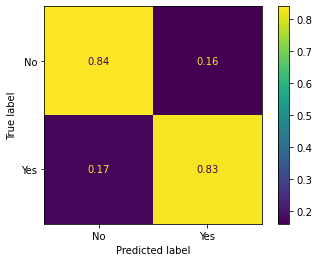

In [14]:
mlu.model_evaluation(m.base_estimator, X_val, y_val)